# Facial keypoint detection 

## Imports

In [8]:
import sys
sys.path.append('../src')

from data import dataset as ds
from model import model as md
from model import run as run
import matplotlib.pyplot as plt
%matplotlib inline


## Train model on existing dataset
No hassle - existing dataset, existing architecture

__I strongly advise to use config file in all of this, so make sure it is configured properly and you dont have to worry about me forgeting to a pass a value somewhere as it will default to one in config...__  

First and foremost - you need a dataset, you can fetch my one with DVC  
Compressed dataset of `15000` images weighs around `500mb`, so this step might take a while  
  
  
This exact dataset is made for model with `128x128x3 input shape`, which means that the model should accept the exact same shape    
Model defined in model.py is exactly like that so don't worry   

***If you want to train a model with different input shape - you need to create your own dataset***  
Which is tinkering at its best...

In [ ]:
!dvc pull -q

Now you can fetch it, get a model and train it

In [ ]:
train_x, train_y, test_x, test_y = ds.fetch_splits()
model = md.compile_model()

Best results are achieved on around at least `1000` epochs (around where `learning rate plumits to` around `.5% per 100 epochs`),  
but to get a glimpse on models performance 50 epochs are enough **(though the results will be less than perfect)**

In [ ]:
model.fit(train_x,
          train_y,
          epochs=50,
          validation_data=(test_x, test_y),
          shuffle=True,
          verbose = 1)
md.evaluate_model(model, test_x, test_y)


## Training model on your own dataset

Kinda hussly though...

__I strongly advise to use config file in all of this, so make sure it is configured properly and you dont have to worry about me forgeting to a pass a value somewhere as it will default to one in config...__  

It's not that hard to do, though it would take some time (a lot of time if you don't have a .csv ready)

In [ ]:
from data.code import image_to_csv

image_to_csv.image_to_csv()
train_x, train_y, test_x, test_y = ds.fetch_splits(create_new=True)

# For easier reuse of your own dataset you should compress it
ds.compress_splits(train_x, train_y, test_x, test_y)

Best results are achieved on around at least 1000 epochs (around where learning rate plumits to around .5% per 100 epochs),  
but to get a glimpse on models performance 50 epochs are enough

In [ ]:
model.fit(train_x,
          train_y,
          epochs=50,
          validation_data=(test_x, test_y),
          shuffle=True,
          verbose=1)
md.evaluate_model(model, test_x, test_y)

## Loading pretrained model

In [2]:
model = md.load_model()

## Running predictions on model

You can run prediction a single image

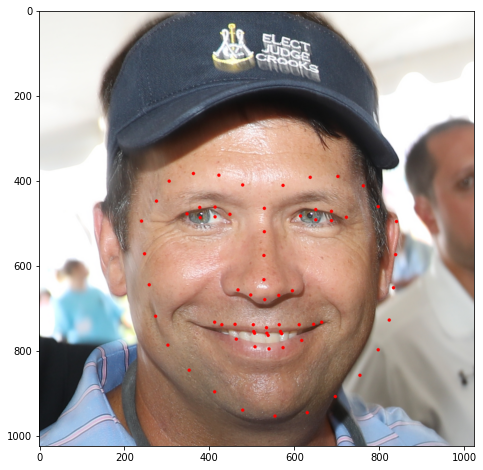

In [10]:
img = run.predict_image(model, './ExampleImage.png')
plt.figure(figsize = (8,8))
imgplot = plt.imshow(img)

# Or use 
# img = run.predict_image(model, './ExampleImage.png', 'output.png')
#   to save result locally

And also on a live video feed from your webcam

Press esc to stop prediction

In [ ]:
run.predict_stream(model)

## That's not everything!

I tried my best to comment on a lot of things in code - you can go ahead and explore if you wish so!